# F分布噪声

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [5]:
def noise_F(M,N,a=1,b=1):
    R1 = np.zeros((M,N),dtype=np.float64)
    R2 = np.zeros((M,N),dtype=np.float64)
    eps = 1.0e-5
    for i in range(a):
        R1 = R1 + 5 * np.random.randn(M,N) ** 2
        R2 = R2 + 5 * np.random.randn(M,N) ** 2
        R = R1 / (R2 + eps)
    return R

In [16]:
noise = noise_F(src.shape[0],src.shape[1])
print(noise)

[[7.92814716e-02 6.67975110e+00 3.79179071e-01 ... 4.96575918e-01
  2.54914509e-02 2.62308535e-01]
 [4.49338126e-01 2.19210064e-01 3.40511060e+00 ... 2.65737576e+00
  1.55140739e+00 3.09004355e+01]
 [3.96303002e+01 1.99664294e+00 3.09512012e+00 ... 4.38084739e+00
  1.16337616e+03 2.06235346e-01]
 ...
 [1.06847729e+00 6.28215126e+00 7.37292899e-01 ... 5.77607018e+02
  9.52765546e-01 2.60232532e+02]
 [1.53890381e+01 4.48734456e-01 1.56118348e+01 ... 9.03735813e+00
  1.38522173e+01 6.76339390e-01]
 [5.12221876e+00 3.56840239e-03 8.35215248e+00 ... 4.64608858e+02
  4.50118307e+02 2.66744162e-05]]


In [17]:
noise_uint = cv2.convertScaleAbs(noise * 255)
src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

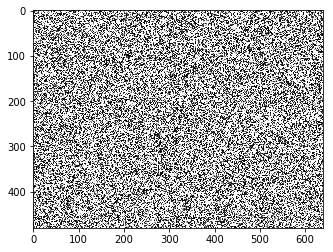

In [18]:
plt.imshow(noise_uint,'gray')

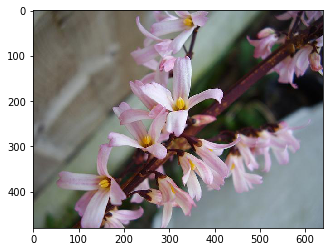

In [19]:
plt.imshow(src)

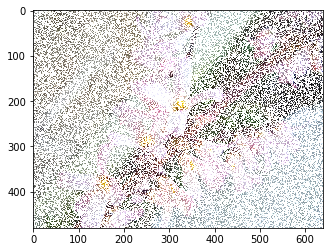

In [20]:
plt.imshow(cv2.convertScaleAbs(src_noise))